In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import numpy as np

In [37]:
# read csv
internet_df = pd.read_csv("internet.csv")

# Save the dependent values in y and independent values in list X
X = internet_df[['Hour','Users']]
y = internet_df['Speed']

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

<Axes: >

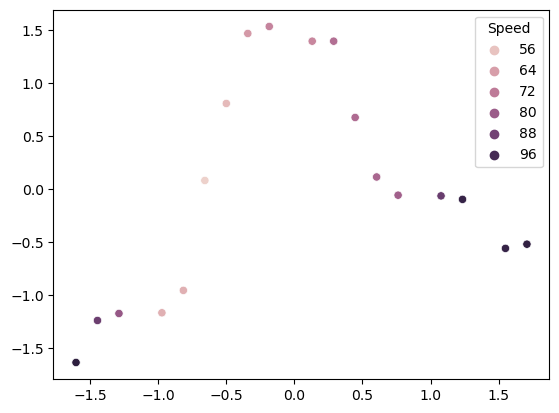

In [38]:
# for a multiple regression case the simple scatter plot is not useful as we have multiple variables. We therefore use seaborn
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=internet_df['Speed'])


In [47]:
# Create a linear regression model and fit the data
model = linear_model.LinearRegression()
model.fit(X_scaled, y)
scaled_X_for_prediction = std_scaler.transform([[20, 750]])
print (scaled_X_for_prediction)

[[ 1.39232838 -0.18309865]]


/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
predicted_speed = model.predict([scaled_X_for_prediction[0]])
print (predicted_speed)

[95.01460565]


In [41]:
print(model.__dir__())

['fit_intercept', 'copy_X', 'n_jobs', 'positive', 'n_features_in_', 'coef_', 'rank_', 'singular_', 'intercept_', '__module__', '__annotations__', '__doc__', '_parameter_constraints', '__init__', 'fit', 'set_fit_request', 'set_score_request', '__abstractmethods__', '_abc_impl', '_more_tags', '__dict__', '__weakref__', '__new__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__getstate__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '_estimator_type', 'score', '_decision_function', 'predict', '_set_intercept', '_get_param_names', 'get_params', 'set_params', '__sklearn_clone__', '__setstate__', '_get_tags', '_check_n_features', '_check_feature_names', '_validate_data', '_validate_params', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_build_request_for_signature', '_get_default_requests', '_get_metada

In [42]:
print (model.coef_)

[ 9.1024141  -8.94730715]


In [43]:
# There are 2 regression coefficients as you can see. The first one denotes that for an increase in hour, there will be an increase in the speed.
# lets check it out
predicted_speed_21 = model.predict([[21, 750]])
print (predicted_speed_21)

[-6441.49633421]


In [44]:
# as you can see the speed increased from 92.1451 to 93.5798. At the same time the other coefficient is the "User's coeffiecient" which will decrease
# by 0.05.
predicted_speed_751_users = model.predict([[20,751]])
print (predicted_speed_751_users)

[-6459.54605546]


In [45]:
# you can see the speed was 92.14512274 which has been decreased by 0.05909483 (92.14512274 - 0.05909483) resulting in the above answer: 92.08602792